In [2]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() 
X_train = X_train / 255.0 
X_test = X_test / 255.0 

In [4]:
model_overfit = keras.models.Sequential() 
model_overfit.add(keras.layers.Flatten(input_shape=(28, 28))) 
model_overfit.add(keras.layers.Dense(128, activation="relu")) 
model_overfit.add(keras.layers.Dense(10, activation="softmax")) 
model_overfit.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [5]:
history_overfit = model_overfit.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test)) 
test_loss, test_acc = model_overfit.evaluate(X_test, y_test) 
print("Test accuracy:", test_acc) 
print(test_loss)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8783 - loss: 0.4311 - val_accuracy: 0.9535 - val_loss: 0.1569
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9661 - loss: 0.1169 - val_accuracy: 0.9697 - val_loss: 0.0990
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9773 - loss: 0.0757 - val_accuracy: 0.9696 - val_loss: 0.0916
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9836 - loss: 0.0543 - val_accuracy: 0.9758 - val_loss: 0.0749
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9871 - loss: 0.0404 - val_accuracy: 0.9812 - val_loss: 0.0625
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9903 - loss: 0.0324 - val_accuracy: 0.9720 - val_loss: 0.0878
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9927 - loss: 0.0253 - val_accuracy: 0.9798 - val_loss: 0.0662
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9939 - loss: 0

In [7]:
model_dropout = keras.models.Sequential() 
model_dropout.add(keras.layers.Flatten(input_shape=(28, 28))) 
model_dropout.add(keras.layers.Dense(128, activation="relu")) 
model_dropout.add(keras.layers.Dropout(0.3))
model_dropout.add(keras.layers.Dense(10, activation="softmax")) 
model_dropout.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
history_dropout = model_dropout.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test)) 
test_loss, test_acc = model_dropout.evaluate(X_test, y_test) 
print("Test accuracy:", test_acc) 
print(test_loss)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8508 - loss: 0.5060 - val_accuracy: 0.9585 - val_loss: 0.1405
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9522 - loss: 0.1677 - val_accuracy: 0.9676 - val_loss: 0.1065
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9625 - loss: 0.1264 - val_accuracy: 0.9720 - val_loss: 0.0933
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9690 - loss: 0.0995 - val_accuracy: 0.9756 - val_loss: 0.0845
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9718 - loss: 0.0896 - val_accuracy: 0.9761 - val_loss: 0.0796
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9747 - loss: 0.0803 - val_accuracy: 0.9787 - val_loss: 0.0736
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9757 - loss: 0.0746 - val_accuracy: 0.9782 - val_loss: 0.0736
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9775 - loss: 0

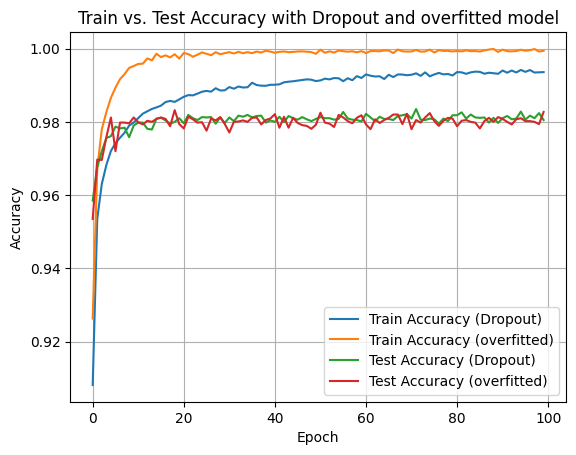

In [11]:
plt.plot(history_dropout.history["accuracy"], label="Train Accuracy (Dropout)")
plt.plot(history_overfit.history['accuracy'], label="Train Accuracy (overfitted)")
plt.plot(history_dropout.history["val_accuracy"], label="Test Accuracy (Dropout)")
plt.plot(history_overfit.history['val_accuracy'], label="Test Accuracy (overfitted)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train vs. Test Accuracy with Dropout and overfitted model")
plt.grid(True)
plt.show()
